# Physics 256
## Linear Regression and Least Squares Fitting

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png" width=600px>

## Last Time

- The logistic map
- a simple route to chaotic behavior
- period doubling, fixed points and attractors


## Today

- An introduction to the theory of curve fitting 

## Setting up the Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('notebook');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

## Least Squares Analysis 
Science is exceedingly becoming a *data rich* pursuit and modern experiments or simulations can easily produce terabytes of data.  Curve fitting or regression analysis is the simplest type of *data analysis*.

We begin by considering $N$ two dimensional data points:

$$\{(x_0,y_0),\ldots,(x_{N-1},y_{N-1})\} $$

and we want to fit this data to a continous function:

$$Y(x;\vec{a})$$

where $\vec{a}$ is a vector of $M$ adjustable parameters that we want to determine such that our data **fits** the function.   

Intuitively, this means that our data points should fall *near* the curve $Y$, we can quantify by defining the residual $\Delta_i$ for each point:

\begin{equation}
\Delta_i \equiv Y(x_i;\vec{a}) - y_i .
\end{equation}

Our approach will be to find $\vec{a}$ such that it minimizes the **squares** of these errors:  
\begin{equation}
\sum_{i=0}^{N-1} \Delta_i^2 = \sum_{i=0}^{N-1} \left[Y(x_i;\vec{a}) - y_i\right]^2 .
\end{equation}
This is known as **least-squares fitting** and it was first used by Gauss to determine the orbits of the comets from observational data.

If there are uncertainties in the data such that $y_i \to y_i \pm \sigma_i$ then we need to modify this equation to place less emphasis on those data points with large error.  This defines the $\chi^2$ residual:

\begin{equation}
\chi^2 = \sum_{i=0}^{N-1} \left(\frac{\Delta_i}{\sigma_i}\right)^2 = \sum_{i=0}^{N-1} \frac{1}{\sigma_i^2} \left[Y(x_i;\vec{a}) - y_i\right]^2 .
\end{equation}

If we assume that the errors $\sigma_i$ are normally distributed, we can make concrete statistical statements about the goodness of fit.

## Anscombe's quartet

Before we learn how to do this, it is important to note that fitting a curve to a given dataset does not in of itself produce anything meaningful.  One must carefully ask the question:

*What is the probability that the data, given their uncertainties, are described by the curve?*

This is the statistical science of hypothesis testing.  We will investigate a linear fit to a [special data set](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) that highlights the need to actually graph our data and consider the fit.

In [2]:
def linear(x,a):
    '''A linear fitting function.'''
    return a[0] + a[1]*x

def χ2(Y,y):
    '''Unscaled χ^2'''
    return np.sum((Y-y)**2)

anscombe = np.array([[10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58],[8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76],
[13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71],[9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84],
[11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47],[14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04],
[6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25],[4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50],
[12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56],[7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91],
[5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.8]])

[<matplotlib.text.Text at 0x1104417f0>, <matplotlib.text.Text at 0x11048ee48>]

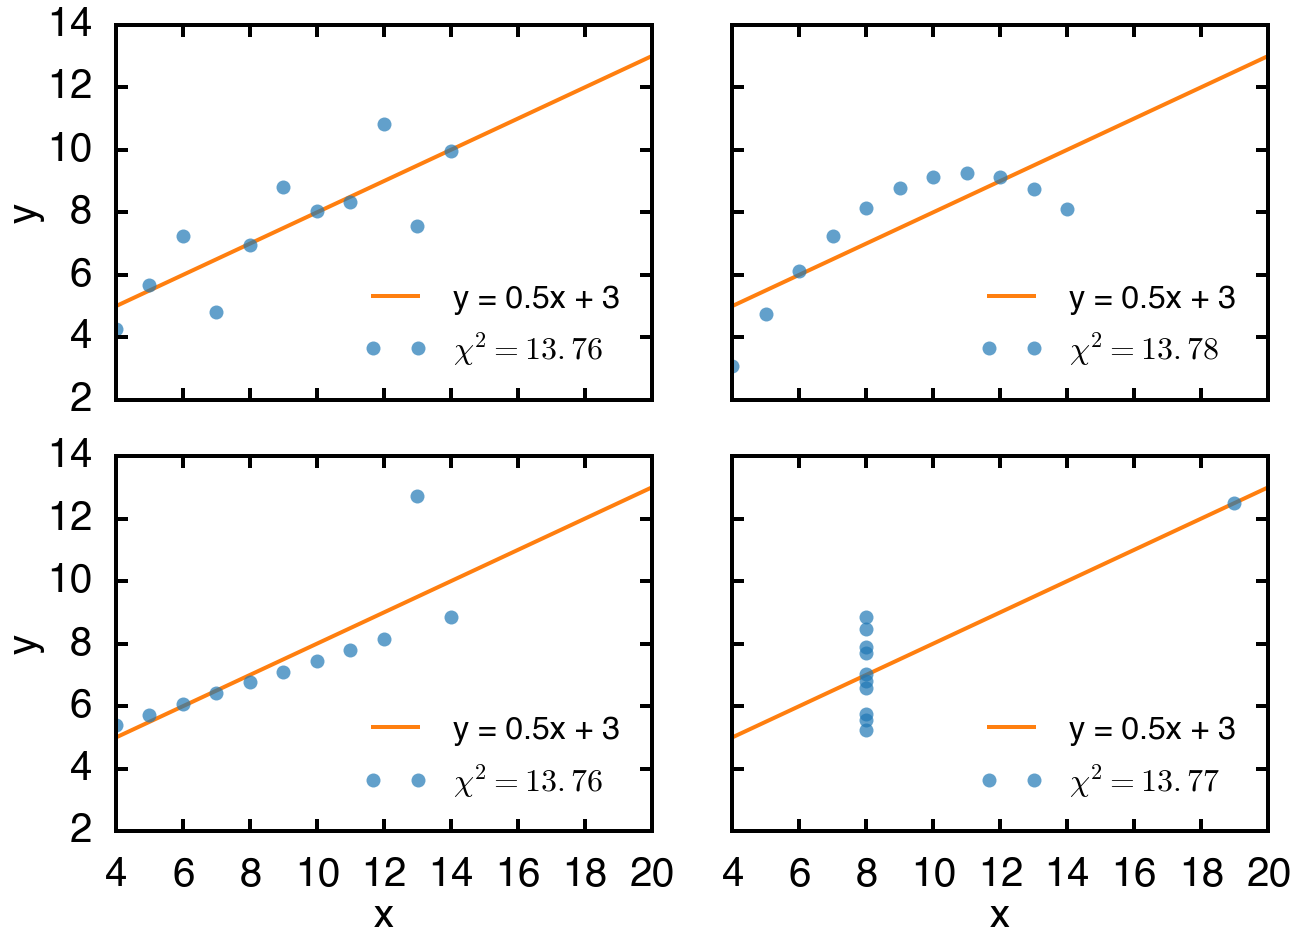

In [3]:
fig, axes = plt.subplots(2,2,sharex=True, sharey=True, squeeze=False, figsize=(10,7))
x = np.linspace(4,20,1000)
for i, ax in enumerate(axes.flat):
    Y = linear(x,(3,0.5))
    ax.plot(x,Y,'-',color=colors[1], linewidth=2, label='y = 0.5x + 3')
    r2 = χ2(linear(anscombe[:,2*i],(3,0.5)),anscombe[:,2*i+1])
    ax.plot(anscombe[:,2*i],anscombe[:,2*i+1],'o', markeredgecolor='None', alpha=0.7, markersize=7,
           label=r'$\chi^2 = %4.2f$'%r2)
    ax.legend(loc='lower right')

[ax.set_ylabel('y') for ax in axes[:,0]]
[ax.set_xlabel('x') for ax in axes[-1,:]]

## Linear Regression

How were the coefficients in the Ancombe Quartet linear fit determined?  

Let us investigate $\chi^2$ for a linear fitting function defined by:

\begin{equation}
Y(x;a_0,a_1) = a_0 + a_1 x
\end{equation}

such that

\begin{equation}
\chi^2 = \sum_{i=0}^{N-1} \frac{1}{\sigma_i^2} \left(a_0 + a_1 x_i - y_i\right)^2 .
\end{equation}

We want to minimize $\chi^2$ over the parameters $\vec{a}$:
\begin{align}
\frac{\partial \chi^2}{\partial a_0} &= 2 \sum_i \frac{1}{\sigma_i^2}(a_0 + a_1 x_i - y_i) = 0\newline
\frac{\partial \chi^2}{\partial a_1} &= 2 \sum_i \frac{1}{\sigma_i^2}(a_0 + a_1 x_i - y_i)x_i = 0 .
\end{align}

Defining:
\begin{equation}
\Sigma_q = \sum_i \frac{q_i}{\sigma_i^2}
\end{equation}
and solving these two equations yields:

\begin{align}
a_0 &= \frac{\Sigma_y\Sigma_{x^2} - \Sigma_x \Sigma_{xy}}{\Sigma_1\Sigma_{x^2} - (\Sigma_x)^2 } \newline
a_1 &= \frac{\Sigma_1\Sigma_{xy} - \Sigma_y \Sigma_{x}}{\Sigma_1\Sigma_{x^2} - (\Sigma_x)^2 } .
\end{align}

**Note:** If the errors are constant, i.e. $\sigma_i = \sigma\ \forall\ i=0,\ldots,N-1$ then it drops out of these expressions.  Thus we can use this formulation for fitting even if we don't know the uncertainties by setting $\sigma_i = 1$.

### Computing the uncertainty in $\vec{a}$

We can determine the uncertainty or error in our fit parameters using conventional error propagation resulting in:

\begin{equation}
\sigma^2_{a_\alpha} = \sum_i \left( \frac{\partial a_\alpha}{\partial y_i}\right)^2 \sigma_i^2 .
\end{equation}

We find:

\begin{align}
\sigma^2_{a_0} &= \frac{\Sigma_{x^2}}{\Sigma_1\Sigma_{x^2} - (\Sigma_x)^2} \newline
\sigma^2_{a_1} &= \frac{\Sigma_{1}}{\Sigma_1\Sigma_{x^2} - (\Sigma_x)^2} .
\end{align}

### Let's write some functions to perform a linear least-squares fit

In [4]:
def Σ(σ,q):
    '''Compute the Σ function needed for linear fits.'''
    return np.sum(q/σ**2)

def get_a(x,y,σ):
    '''Get the χ^2 best fit value of a0 and a1.'''

    # Get the individual Σ values
    Σy,Σx,Σx2,Σ1,Σxy = Σ(σ,y),Σ(σ,x),Σ(σ,x**2),Σ(σ,np.ones(x.size)),Σ(σ,x*y)

    # the denominator
    D = Σ1*Σx2 - Σx**2

    # compute the best fit coefficients
    a = np.array([Σy*Σx2 - Σx*Σxy,Σ1*Σxy - Σx*Σy])/D

    # Compute the error in a
    aErr = np.array([np.sqrt(Σx2/D),np.sqrt(Σ1/D)])

    return a,aErr

<div class="span alert alert-success">
<h2> Group Programming challenge </h2>
Load the experimental data for the temperature T along a metal rod of length 10 cm
suspended between two constant temperature baths in file  `rod_temperature.dat`. Perform a linear fit to the data and display the resulting fit function and parameters in the legend.
</div>

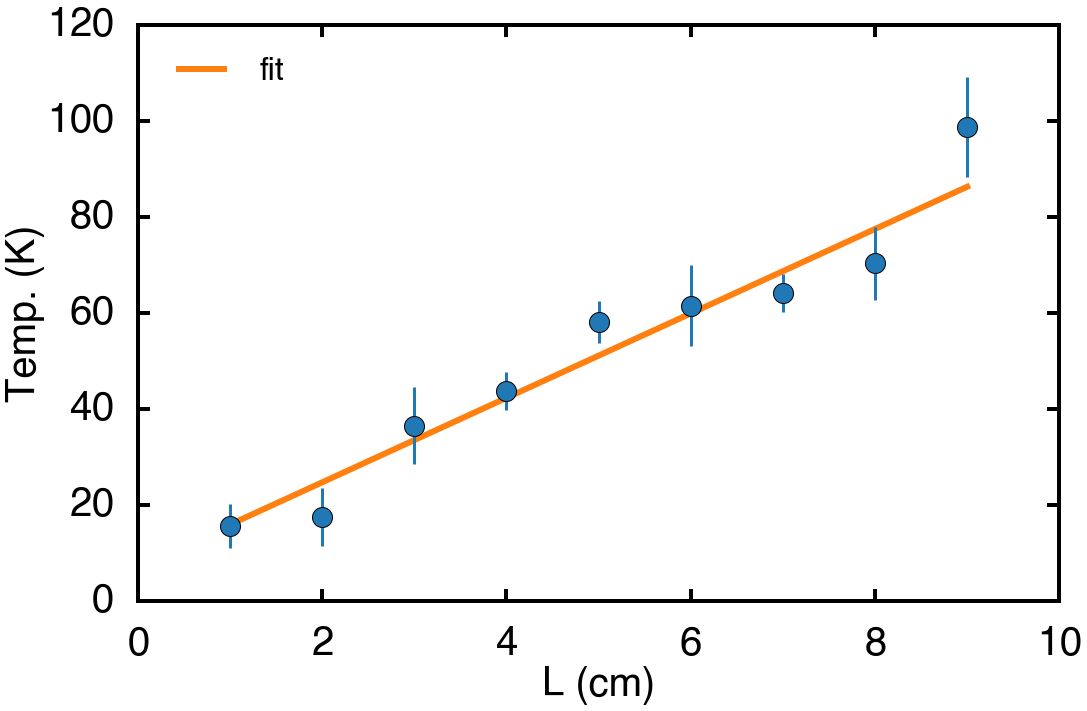

In [9]:
x,y,σ = np.loadtxt('data/rod_temperature.dat',unpack=True)
plt.errorbar(x,y,yerr=σ,linestyle='None', marker='o', capsize=0, elinewidth=1.5)
a,aErr= get_a(x,y,σ)
plt.plot(x,linear(x,a),label='fit',zorder=0)
plt.xlabel('L (cm)')
plt.ylabel('Temp. (K)')
plt.xlim(0,10)
plt.legend(loc=2)

In [75]:
data = np.genfromtxt('data/rod_temperature.dat',names=True,skip_header=3)
